In [1]:
# Entrenamiento de modelo de reconocimiento de gestos (letras A-Z)

# Paso 1: Cargar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paso 2: Cargar el dataset
df = pd.read_csv('data/dataset.csv')
print(f"Total de muestras: {len(df)}")
df.head()

Total de muestras: 1830


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y12,y13,y14,y15,y16,y17,y18,y19,y20,label
0,0.0,0.0,-0.131781,-0.100044,-0.184678,-0.281004,-0.157238,-0.448466,-0.087091,-0.530064,...,-0.957809,0.133403,-0.426683,0.141694,-0.590475,0.144376,-0.702641,0.144910,-0.813413,B
1,0.0,0.0,-0.131598,-0.098990,-0.186642,-0.278989,-0.161022,-0.449594,-0.088074,-0.530986,...,-0.955820,0.133664,-0.428772,0.141868,-0.594559,0.145046,-0.707751,0.146190,-0.818711,B
2,0.0,0.0,-0.132207,-0.105974,-0.188130,-0.288679,-0.160573,-0.458690,-0.084155,-0.531838,...,-0.957547,0.132489,-0.427054,0.140973,-0.595221,0.145512,-0.709239,0.147795,-0.820483,B
3,0.0,0.0,-0.132690,-0.104884,-0.184269,-0.285012,-0.160462,-0.454908,-0.084266,-0.536292,...,-0.949555,0.135530,-0.428661,0.143985,-0.592964,0.147438,-0.705329,0.148754,-0.816188,B
4,0.0,0.0,-0.130860,-0.105309,-0.184819,-0.282377,-0.158806,-0.454232,-0.080495,-0.535862,...,-0.951885,0.132811,-0.424964,0.141364,-0.592240,0.145956,-0.706246,0.147650,-0.817338,B


In [3]:
# Paso 3: Separar X (características) e y (etiquetas)
X = df.drop('label', axis=1)
y = df['label']

In [4]:
# Paso 4: Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Muestras de entrenamiento: {len(X_train)}, Prueba: {len(X_test)}")

Muestras de entrenamiento: 1464, Prueba: 366


In [5]:
# Paso 5: Entrenar el modelo (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Paso 6: Evaluar el modelo
y_pred = knn.predict(X_test)
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        14
           B       1.00      1.00      1.00        10
           C       1.00      1.00      1.00        11
           D       1.00      1.00      1.00        10
           E       1.00      1.00      1.00        11
           F       1.00      1.00      1.00        10
           G       1.00      1.00      1.00        12
           H       1.00      1.00      1.00        13
           I       1.00      1.00      1.00        12
           J       1.00      0.94      0.97        18
           K       1.00      1.00      1.00        11
           L       1.00      1.00      1.00        16
           M       1.00      1.00      1.00        14
           N       1.00      1.00      1.00        12
           O       1.00      1.00      1.00        14
           P       1.00      1.00      1.00        16
           Q       1.00      1.00      1.00        12

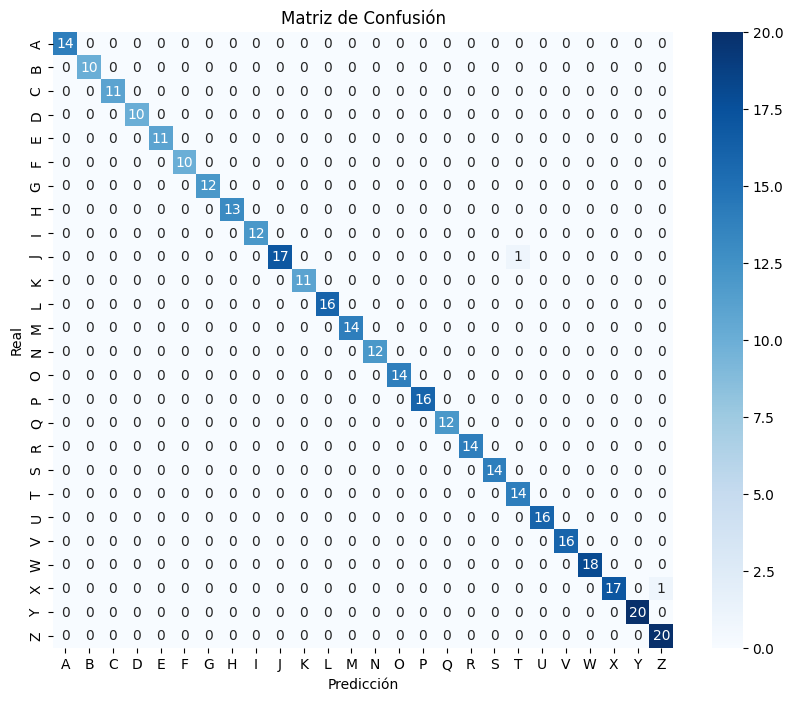

In [7]:
# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [8]:
# Paso 7: Guardar el modelo entrenado
with open('data/gesture_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

print("Modelo guardado como 'data/gesture_model.pkl'")

Modelo guardado como 'data/gesture_model.pkl'
